# Homework 8 writeups
**Name:** Oorjit Chowdhary

**Section:** AMATH 301 B

## Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#### Load in the image of Olive's perfect paws.

In [2]:
A = cv2.imread('olive.jpg', 0)
U, S, Vt = np.linalg.svd(A, full_matrices=False)

#### Part (a) - 2x2 grid

Text(0.5, 1.0, 'Rank r Approximation')

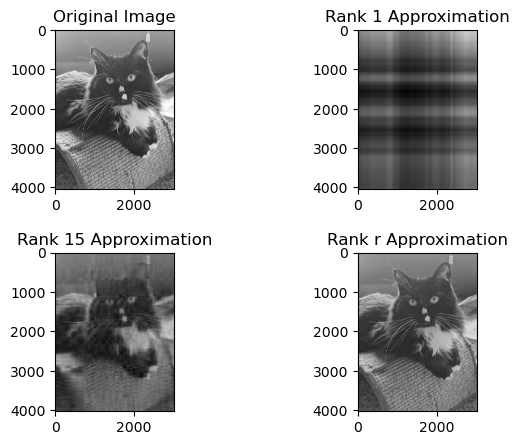

In [3]:
fig, ax = plt.subplots(2, 2)
fig.tight_layout(pad=2.5)

ax[0,0].imshow(A, cmap='gray')
ax[0,0].set_title('Original Image')

rank1 = (U[:, 0:1] @ np.diag(S)[0:1, 0:1]) @ Vt[0:1, :]
ax[0,1].imshow(rank1, cmap='gray')
ax[0,1].set_title('Rank 1 Approximation')

rank15 = (U[:, 0:15] @ np.diag(S)[0:15, 0:15]) @ Vt[0:15, :]
ax[1,0].imshow(rank15, cmap='gray')
ax[1,0].set_title('Rank 15 Approximation')

total_energy = np.sum(S)
rank_r_approx = 0
r = 0

while rank_r_approx < 0.75:
    r += 1
    rank_r_approx = np.sum(S[:r]) / total_energy

rank_r = (U[:, 0:r] @ np.diag(S)[0:r, 0:r]) @ Vt[0:r, :]
ax[1,1].imshow(rank_r, cmap='gray')
ax[1,1].set_title('Rank r Approximation')

#### Part b - Calculate the total number of pixels for the image and its approximation.

In [4]:
full_img_pixels = A.shape[0] * A.shape[1]
print("Total number of pixels in full image:", full_img_pixels)

r_points = (A.shape[0] * r) + (A.shape[1] * r) + r
print("Total number of points in rank r approximation:", r_points)

Total number of pixels in full image: 12192768
Total number of points in rank r approximation: 1594882


#### Part c - Discuss
The rank-r approximation is much more efficient compared to the original image because the full image uses almost 7.65 times more points than rank-r approximation. Additionally, even though the rank-r approximation stores only 75% of the image energy, it seems almost identical to the human eye, which aligns with our goals of image compression.

In [5]:
ratio = full_img_pixels / r_points
print("Ratio of full image to rank r approximation:", ratio)

Ratio of full image to rank r approximation: 7.644934233379021
